In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
%matplotlib inline
color = sns.color_palette()

In [34]:
#train the dataset.

train_df = ( pd.read_json("train.json")
         .reset_index(drop=True) )
train_df.shape
test_df = pd.read_json("test.json").reset_index(drop=True)
train_df['test'] = False
test_df['test'] = True

cdf = train_df.append(test_df).reset_index(drop=True)
cdf.shape

(124011, 16)

In [5]:
train_df.describe()


,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [6]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
3,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
4,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [7]:
train_df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

In [8]:
#predict variable
train_df['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

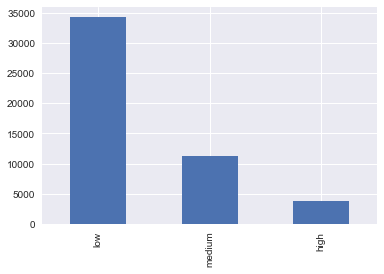

In [9]:
train_df['interest_level'].value_counts().plot(kind="bar")

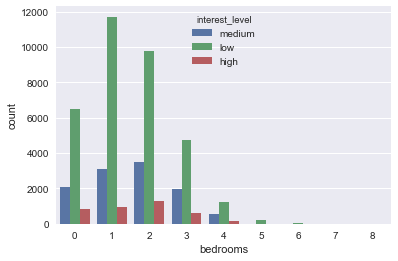

In [10]:
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)

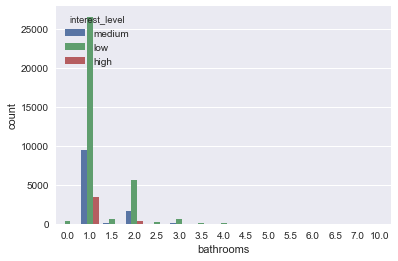

In [11]:
sns.countplot(x='bathrooms', hue='interest_level', data=train_df)

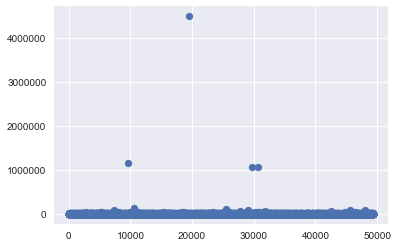

In [12]:
#range of price
plt.scatter(train_df.index, train_df.price)

In [13]:
outlier_limit = train_df.price.quantile(0.99)

C:\Users\alphy\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


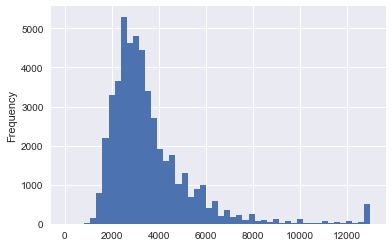

In [14]:
train_df.price.loc[train_df['price'] > outlier_limit] = outlier_limit
train_df.price.plot.hist(bins=50)

In [15]:
train_df.features.head()

0                                                   []
1    [Doorman, Elevator, Fitness Center, Cats Allow...
2    [Laundry In Building, Dishwasher, Hardwood Flo...
3                            [Hardwood Floors, No Fee]
4                                            [Pre-War]
Name: features, dtype: object

In [17]:
def clean(features):
    if len(features) == 0:
        return features
    return [f.lower().replace(' ', '').replace('-','') for f in features]

In [19]:
train_df['cleaned_features'] = train_df.features.apply(lambda flist: clean(flist))
train_df['cleaned_features'].head()

0                                                   []
1    [doorman, elevator, fitnesscenter, catsallowed...
2    [laundryinbuilding, dishwasher, hardwoodfloors...
3                              [hardwoodfloors, nofee]
4                                             [prewar]
Name: cleaned_features, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
train_df['combined_features'] = train_df.cleaned_features.apply(lambda l:', '.join(l))
feature_cv = CountVectorizer(stop_words='english', max_features=100)
features = feature_cv.fit_transform(train_df.combined_features)
columns = feature_cv.get_feature_names()
feature_cv_df = pd.DataFrame(features.todense(), columns = columns)
feature_cv_df.head()

,actualapt,airconditioning,balcony,bikeroom,buildingcommonoutdoorspace,catsallowed,centrala,children,childrensplayroom,commonoutdoorspace,...,valet,valetparking,view,virtualdoorman,walkincloset,washer,washerinunit,wheelchairaccess,wifiaccess,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
feature_counts = feature_cv_df.sum()
feature_counts

actualapt                        67
airconditioning                  39
balcony                        3059
bikeroom                        114
buildingcommonoutdoorspace       39
catsallowed                   23540
centrala                         63
children                         50
childrensplayroom                74
commonoutdoorspace             1293
commonparking                    91
commonroofdeck                   53
concierge                       166
courtyard                        41
diningroom                     5152
dishwasher                    20827
dogsallowed                   22035
doorman                       20970
dryer                           206
dryerinunit                     203
duplex                           68
eatinkitchen                    131
elevator                      26278
exclusive                      2167
exposedbrick                    126
fireplace                       926
fitness                         115
fitnesscenter               

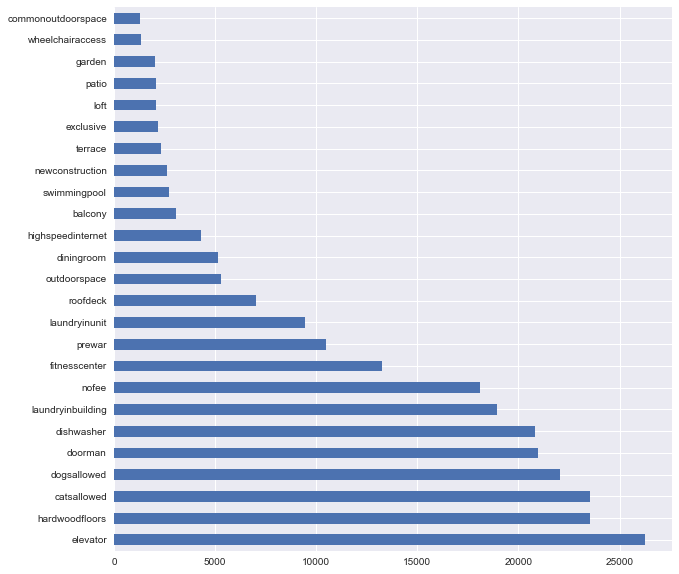

In [23]:
freq_feature_words = feature_counts.nlargest(25)
freq_feature_words.plot(kind='barh', figsize=(10,10))

In [24]:
plt.figure(figsize=(10,8))

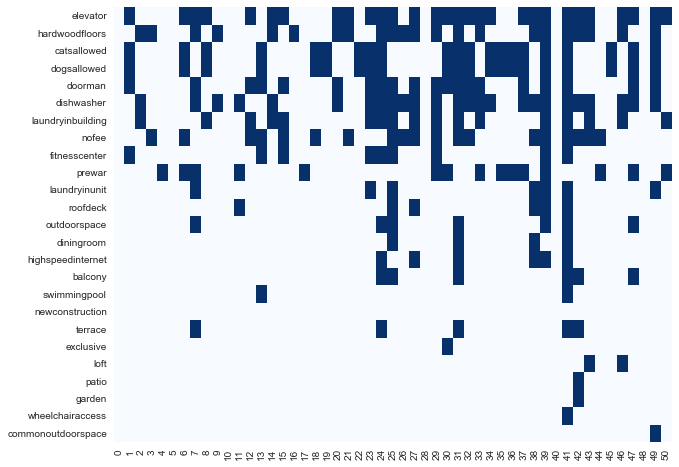

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(feature_cv_df.loc[:50, freq_feature_words.index].T, cmap='Blues', cbar=False)

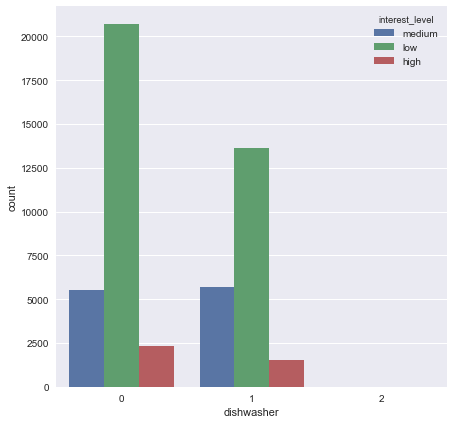

In [30]:
plt.figure(figsize=(7, 7))
sns.countplot(feature_cv_df.dishwasher, hue=train_df.interest_level)

In [46]:
#split dataset to train and test

features_to_drop = [ 'building_id',
                     'created',
                     'description',
                     'display_address',
                     'features',
                     'manager_id',
                    'street_address',
                     'photos']
train_df.drop(features_to_drop, axis=1, inplace=True)
train_df.head(3)

,bathrooms,bedrooms,interest_level,latitude,listing_id,longitude,price,test
0,1.5,3,medium,40.7145,7211212,-73.9425,3000,False
1,1.0,2,low,40.7947,7150865,-73.9667,5465,False
2,1.0,1,high,40.7388,6887163,-74.0018,2850,False


In [48]:
df = train_df[train_df.test == False]
test_df = train_df[train_df.test == True]

In [49]:
X = df.drop(['interest_level', 'listing_id','test'], axis =1).copy()
Y = df.interest_level.copy()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
Y_test_onehot = pd.get_dummies(Y_test)
Y_test_onehot.head()

,high,low,medium
11803,0,1,0
9427,0,1,0
12804,0,0,1
2150,0,1,0
42568,0,1,0


In [52]:
df.shape, test_df.shape

((49352, 8), (0, 8))

In [53]:
#train the model
#with Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [54]:
reg = LogisticRegressionCV(cv=3, multi_class='multinomial', verbose=2, scoring='accuracy', max_iter=5000)

In [55]:
reg.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s finished


LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=5000,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='accuracy',
           solver='lbfgs', tol=0.0001, verbose=2)

In [58]:
#evaluate the model
from sklearn.metrics import log_loss, accuracy_score

y_pred = reg.predict(X_test)
y_prob = pd.DataFrame(data=reg.predict_proba(X_test), columns=reg.classes_)
y_prob.reindex_axis(labels=['high', 'medium', 'low'])

print("Accuracy = ", accuracy_score(Y_test, y_pred))
print("Log-loss = ", log_loss(Y_test_onehot, y_prob))


Accuracy =  0.689652843442
Log-loss =  0.735437873875


In [63]:
#trying random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, max_depth=10, verbose=1)
rfc.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)

In [65]:
from sklearn.metrics import log_loss, accuracy_score

y_pred = rfc.predict(X_test)
y_prob = pd.DataFrame(data=rfc.predict_proba(X_test), columns=rfc.classes_)
y_prob.reindex_axis(labels=['high', 'medium', 'low'])

print("Accuracy = ", accuracy_score(Y_test, y_pred))
print("Log-loss = ", log_loss(Y_test_onehot, y_prob))

Accuracy =  0.70586248818
Log-loss =  0.685001377868


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
